## Importing Libraries and Visualization Design
Necessary Python libraries for data analysis and visualization are imported, and the seaborn style is configured, along with the definition of color palettes.

In [83]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_style("darkgrid")

colors6 = sns.color_palette(['#1337f5', '#E80000', '#0f1e41', '#fd523e', '#404e5c', '#c9bbaa'], 6)
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)

## Data Reading

The code reads a CSV file into a Pandas DataFrame and displays the first few rows.

In [84]:
df = pd.read_csv("data/dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [85]:
profile = ProfileReport(df, title="Profiling Report")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

This section describes  statistical summary measures for the numerical columns in the Pandas DataFrame.

In [87]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


This section provides more information for the categorical columns in the Pandas DataFrame.

In [88]:
df.describe(include="object")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


## Data Analysis

In [89]:
def show_relation(col, according_to, type_='dis'):
    
    plt.figure(figsize=(15, 7))
    
    if type_ == 'dis':
        sns.displot(data=df, x=col, hue=according_to, kind='kde', palette=colors2)
    elif type_ == 'count':
        if according_to is not None:
            perc = df.groupby(col)[according_to].value_counts(normalize=True).reset_index(name='Percentage')
            sns.barplot(data=perc, x=col, y='Percentage', hue=according_to, palette=colors6,
                        order=df[col].value_counts().index)
        else:
            sns.countplot(data=df, x=col, hue=according_to, palette=colors1, order=df[col].value_counts().index)
    
    if according_to is None:
        plt.title(f'{col}')
    else:
        plt.title(f'{col} in relation to {according_to}')

### Percentage of people in the dataset with heart disease

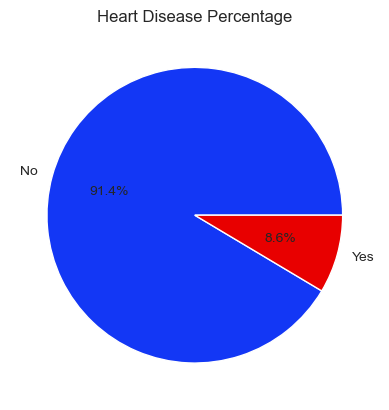

In [90]:
plt.pie(disease_size.values(), labels=disease_size.keys(), autopct='%1.1f%%', colors=colors2)
plt.title('Heart Disease Percentage')
plt.show()

The majority of people in the dataset, 91.4% do not have heart disease, while 8.6% do.  

### Exploring the distribution of heart disease among different age categories

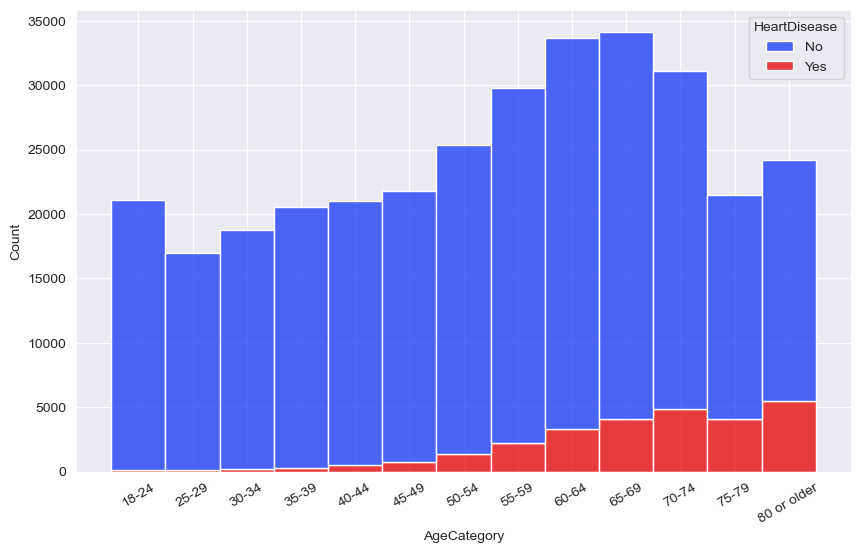

In [110]:
adata = df.sort_values(by=['AgeCategory'], ascending=True)

# ReDefine the color palette
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)

plt.figure(figsize=(10, 6))
sns.histplot(data=adata, x="AgeCategory", hue="HeartDisease", multiple="stack", palette=colors2)
plt.xticks(rotation=30)
plt.show()

Age seems to play a big factor in heart disease, as the likelihood of heart disease increases with age. 

### Exploring the distribution of heart disease between genders

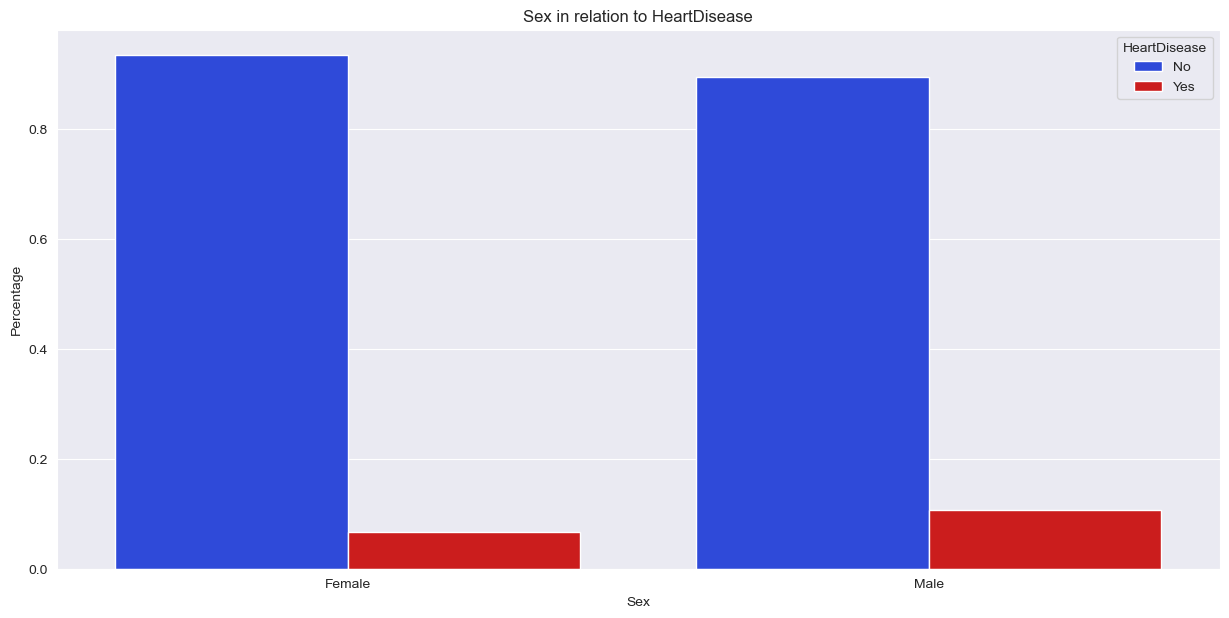

In [ ]:
show_relation(obj_cols[4], 'HeartDisease', type_='count')

Heart disease is more prevalent among men than women.
The dataset comprises more women than men.

### Exploring the distribution of heart disease incidents among races

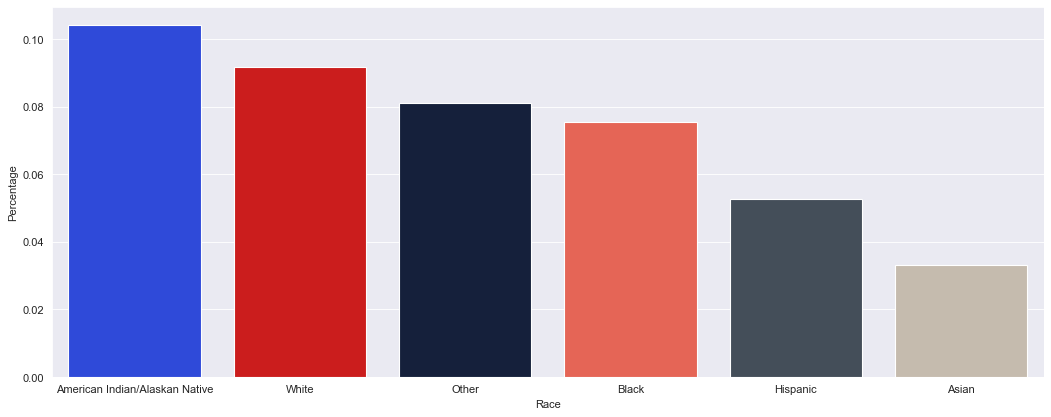

In [ ]:
plt.figure(figsize=(16, 6), dpi=80)
x = df.groupby('Race').HeartDisease.value_counts(normalize=True).reset_index(name='Percentage')
x = x.loc[x.HeartDisease == 'Yes'].sort_values('Percentage', ascending=False)

sns.barplot(data=x, x='Race', y='Percentage', palette=colors6);

The percentage of heart disease is highest among Native Americans, the prevalence of heart disease exceeds 10%, while it is around 9% for whites. Asians have the lowest percentage of heart disease, at approximately 3%.

### Exploring the relationship between BMI and heart disease

In [ ]:
obj_cols = df.select_dtypes(include='object').columns[1:]
num_cols = df.select_dtypes(exclude='object').columns
print(f'Object columns : {obj_cols}', end='\n\n')
print(f'Numberical columns : {num_cols}')

Object columns : Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Numberical columns : Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x700 with 0 Axes>

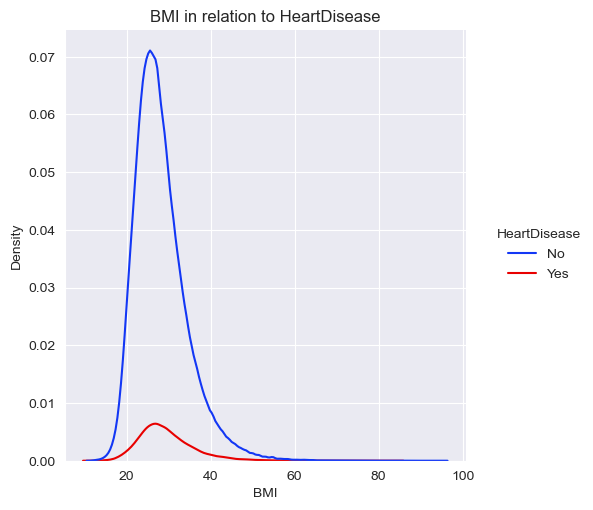

In [ ]:
show_relation(num_cols[0], 'HeartDisease');

Both sets of data exhibit normal distribution characteristics. The BMI distribution for individuals with heart disease displays a subtle inclination towards higher values when contrasted with those without heart disease, suggesting that BMI may not exert a substantial influence on the occurrence of heart disease.

### Exploring the relationship between BMI and the diseases/illnesses in the dataset

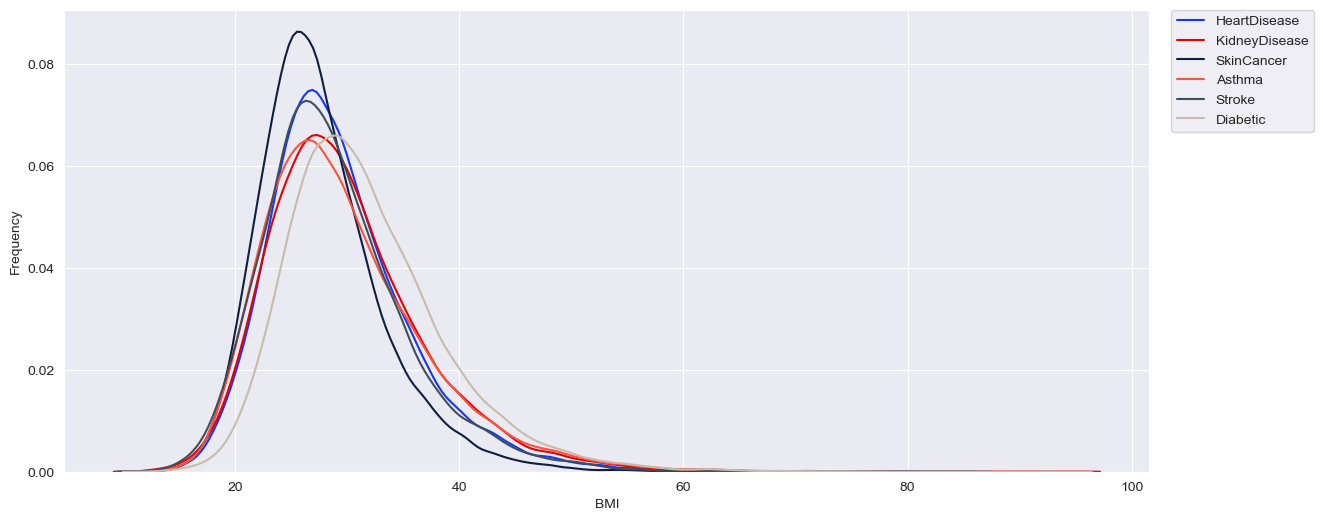

In [107]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["BMI"], alpha=1,fill = False, color=colors6[0], label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["BMI"], alpha=1,fill = False, color=colors6[1], label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["BMI"], alpha=1,fill = False, color=colors6[2], label="SkinCancer", ax = ax)
sns.kdeplot(df[df["Asthma"]=='Yes']["BMI"], alpha=1,fill = False, color=colors6[3], label="Asthma", ax = ax)
sns.kdeplot(df[df["Stroke"]=='Yes']["BMI"], alpha=1,fill = False, color=colors6[4], label="Stroke", ax = ax)
sns.kdeplot(df[df["Diabetic"]=='Yes']["BMI"], alpha=1,fill = False, color=colors6[5], label="Diabetic", ax = ax)

ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

The distribution of BMI varies slightly among individuals with different diseases. Diabetic individuals exhibit the highest mode in BMI, while stroke victims have the lowest BMI mode.

### Exploring the relationship between sleep hours and heart disease in the dataset

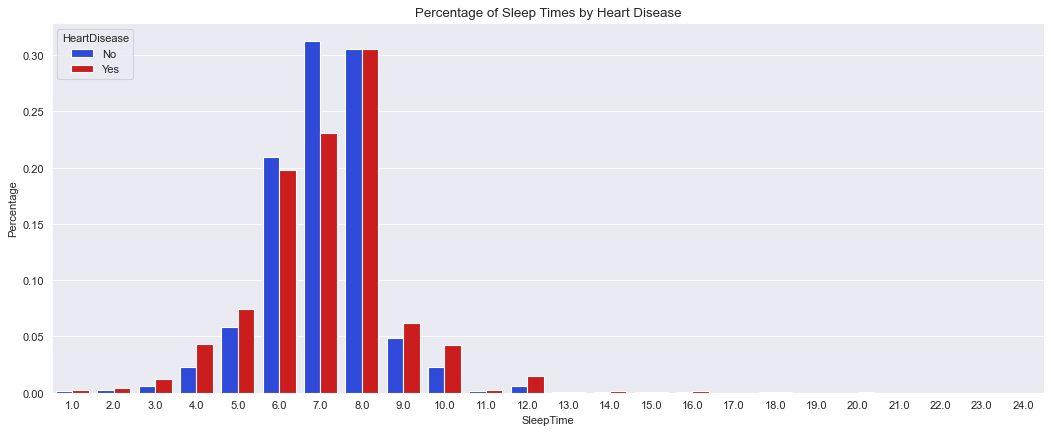

In [98]:
relative = df.groupby('HeartDisease').SleepTime.value_counts(normalize=True).reset_index(name='Percentage')

plt.figure(figsize=(16, 6), dpi=80)
ax = sns.barplot(data=relative, x='SleepTime', y='Percentage', hue='HeartDisease', palette=colors2);

ax.set_title("Percentage of Sleep Times by Heart Disease");

Heart disease patients show a higher prevalence of abnormal sleep duration. Despite constituting 8.5% of the sample, they exhibit higher percentages of both less than 6 hours and more than 9 hours of sleep, both of which are considered abnormal.

### Exploring the relationship between alcohol consumption and heart disease

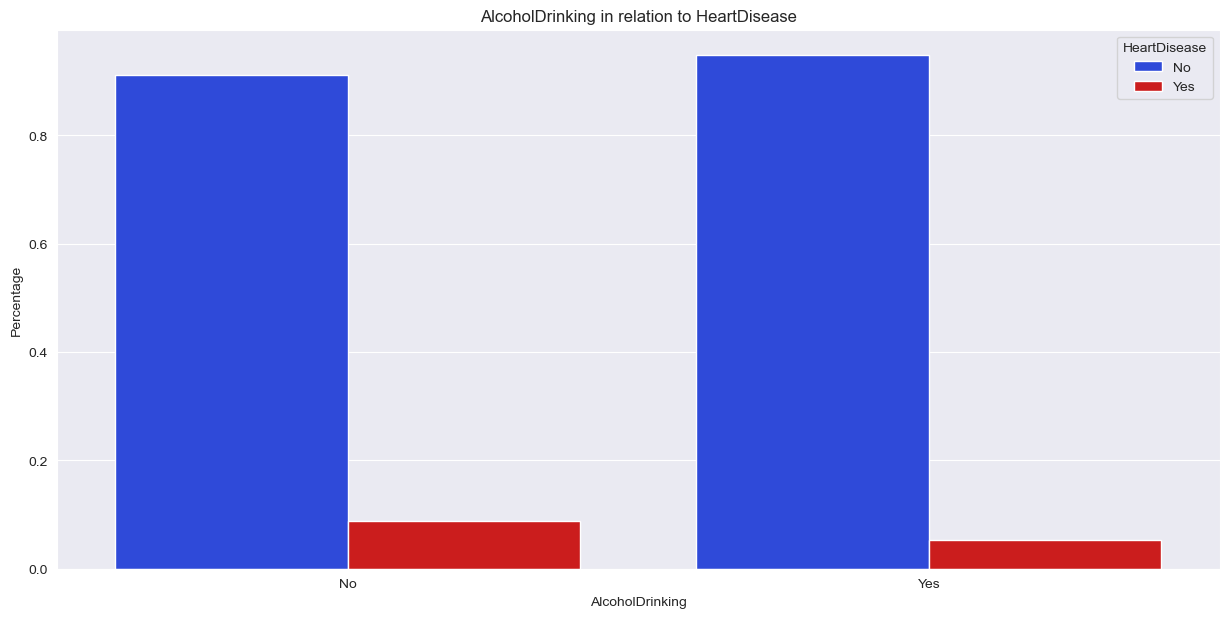

In [111]:
show_relation(obj_cols[1], 'HeartDisease', type_='count')

Remarkably, individuals who consume alcohol display a lower percentage of heart disease compared to those who do not.

### Exploring the relationship between smoking and heart disease

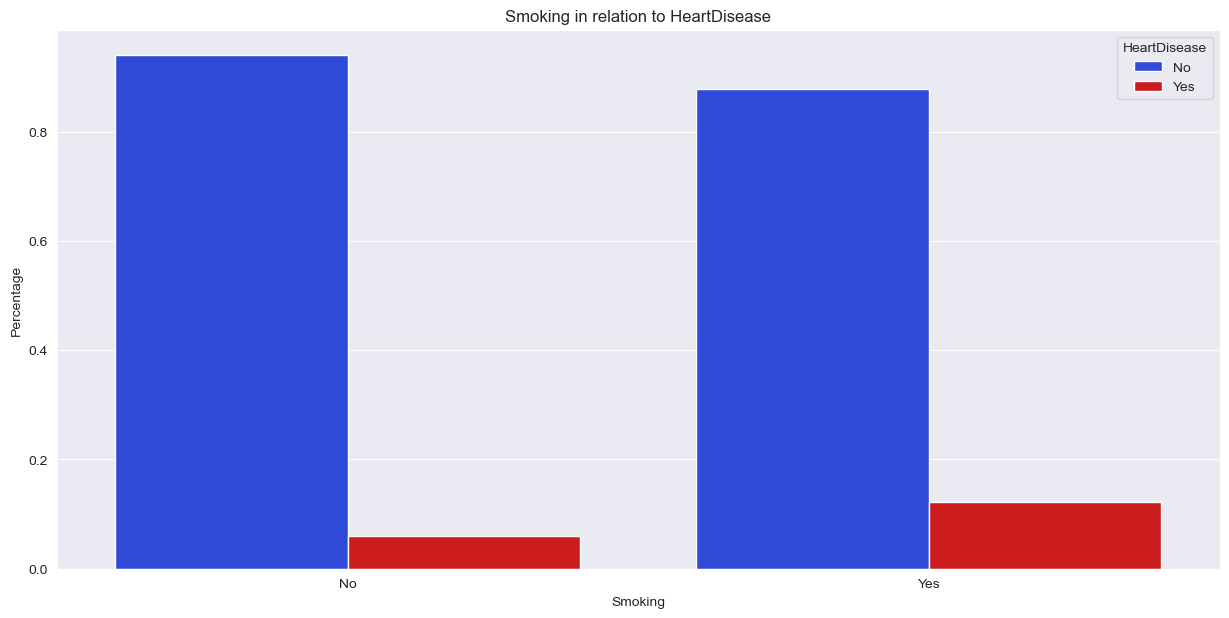

In [99]:
show_relation(obj_cols[0], 'HeartDisease', type_='count')

There is a visible difference in the prevalence of heart disease between individuals who smoke and those who do not. Smokers exhibit a higher likelihood of experiencing heart disease compared to non-smokers.

### Exploring the relationship between stroke incidents and heart disease

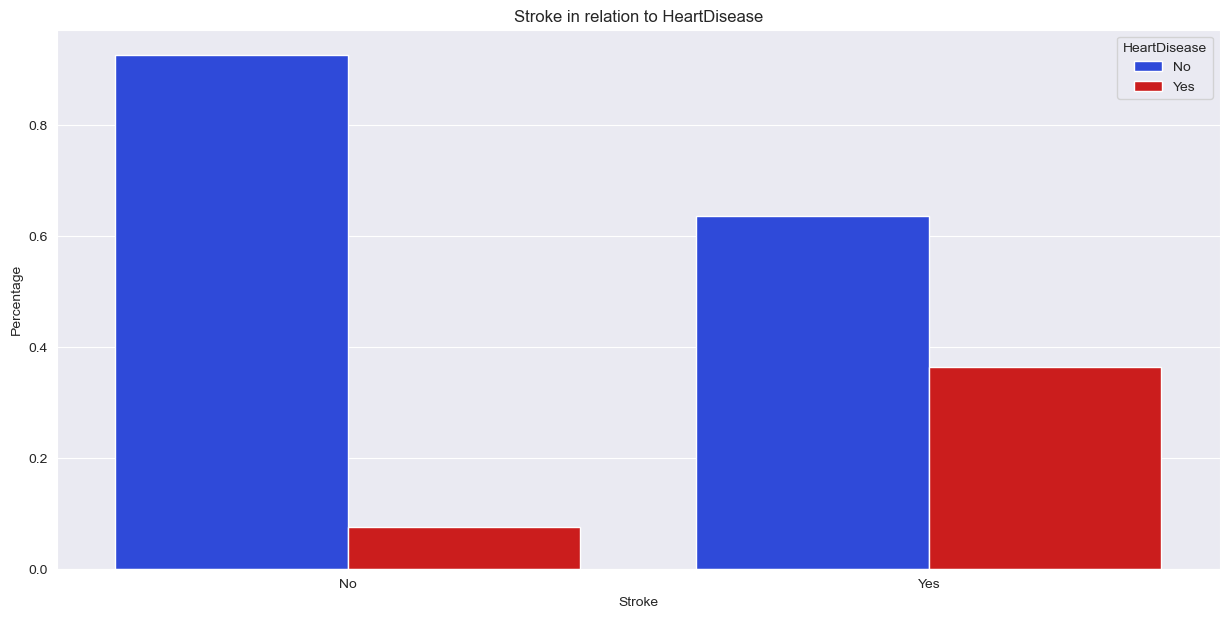

In [101]:
show_relation(obj_cols[2], 'HeartDisease', type_='count')

Experiencing a stroke is highly correlacted with heart disease. Individuals with a history of stroke show a heart disease percentage of approximately 48%, contrasting with those who have not suffered a stroke, among whom the percentage of heart disease is significantly lower, at around 8%.

### Exploring the relationship between diabetes and heart disease

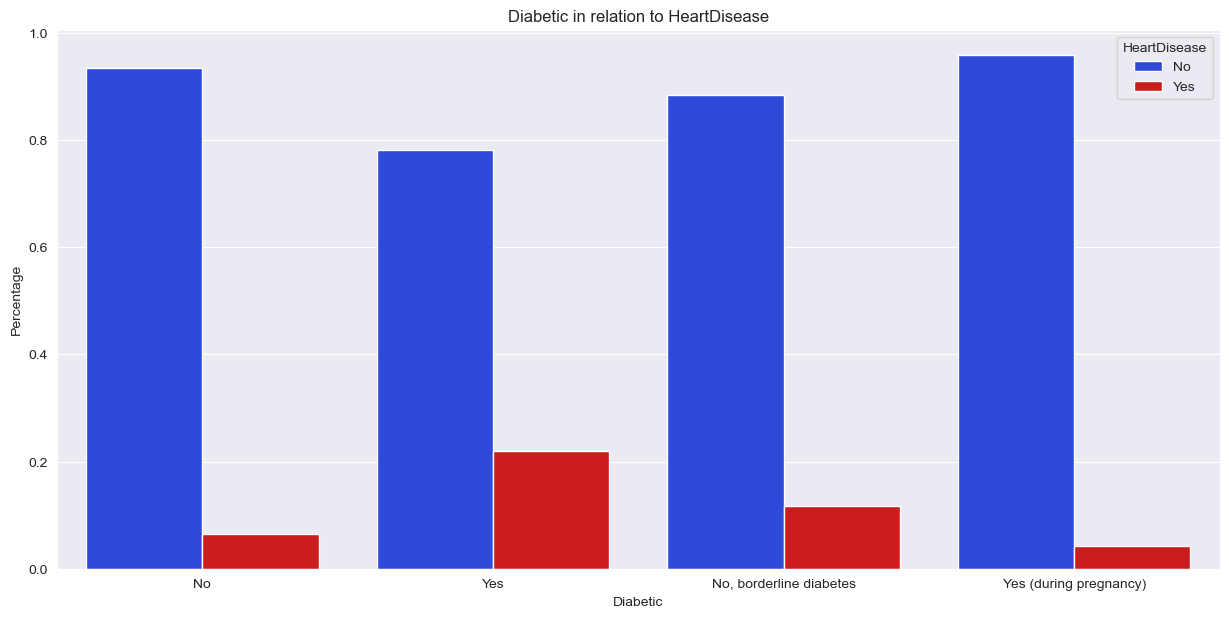

In [102]:
show_relation(obj_cols[7], 'HeartDisease', type_='count')

People with diabetes are at higher risk of heart disease.

### Exploring the relationship between asthma and heart disease

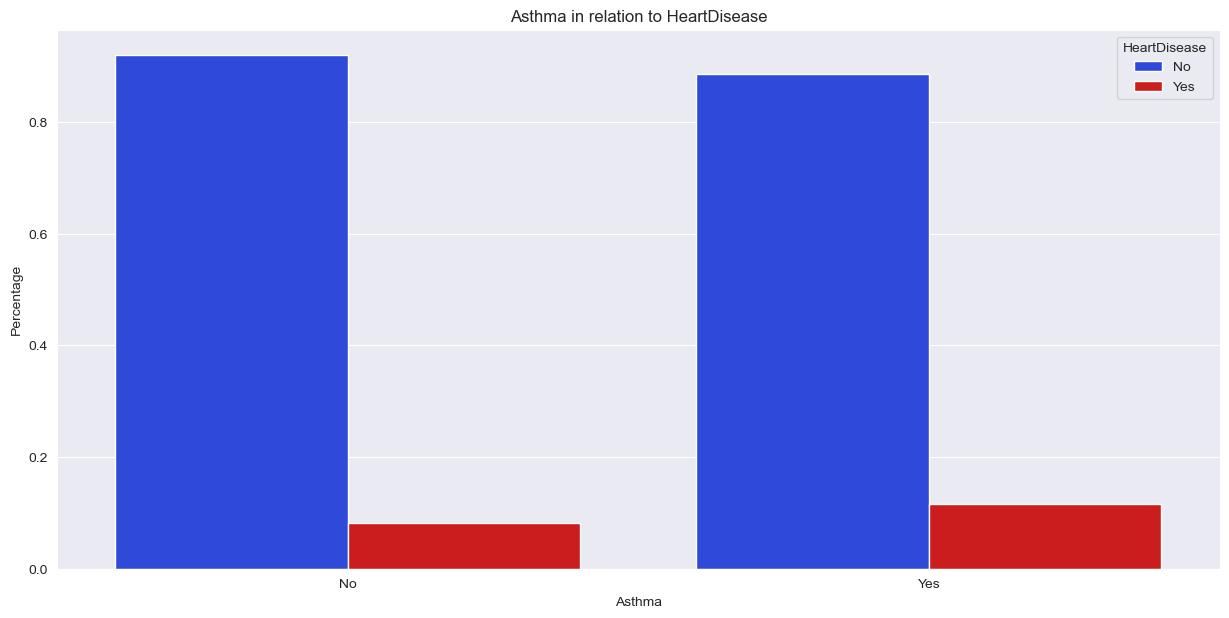

In [103]:
show_relation(obj_cols[10], 'HeartDisease', type_='count')

There is a mild positive correlation between asthma and heart disease.

### Exploring the relationship between kidney disease and heart disease

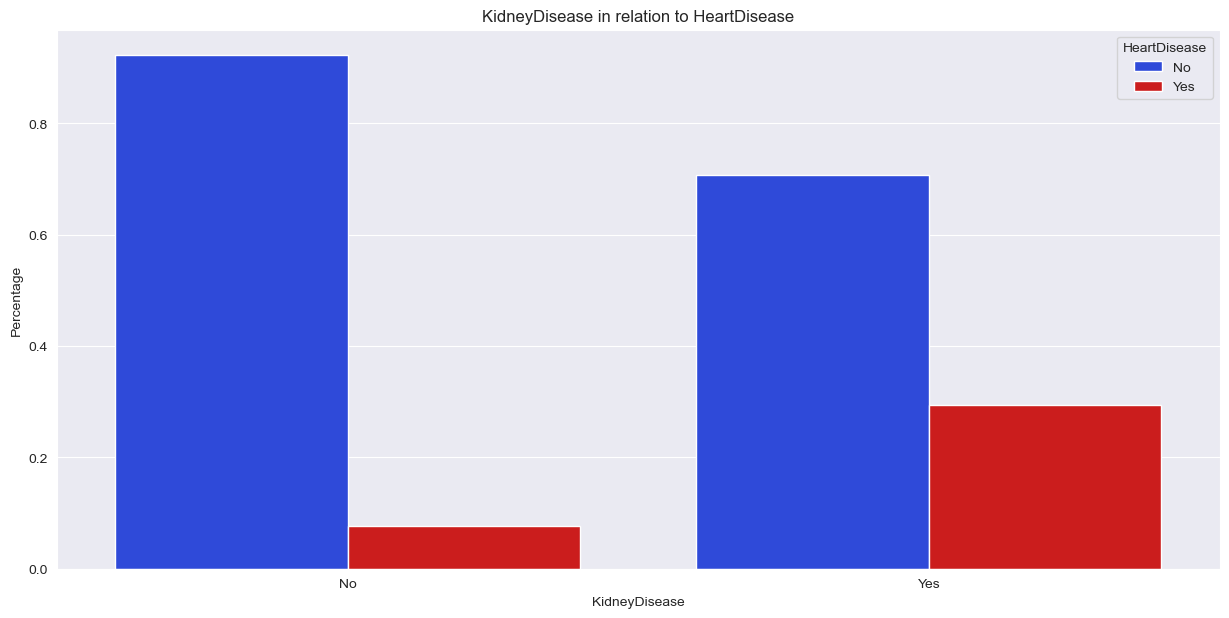

In [104]:
show_relation(obj_cols[11], 'HeartDisease', type_='count')

Individuals who have experienced kidney disease are at a significantly elevated risk of heart disease, with a percentage around 30%, as opposed to approximately 9% in those without a history of kidney disease.

### Exploring the relationship between skin cancer and heart disease

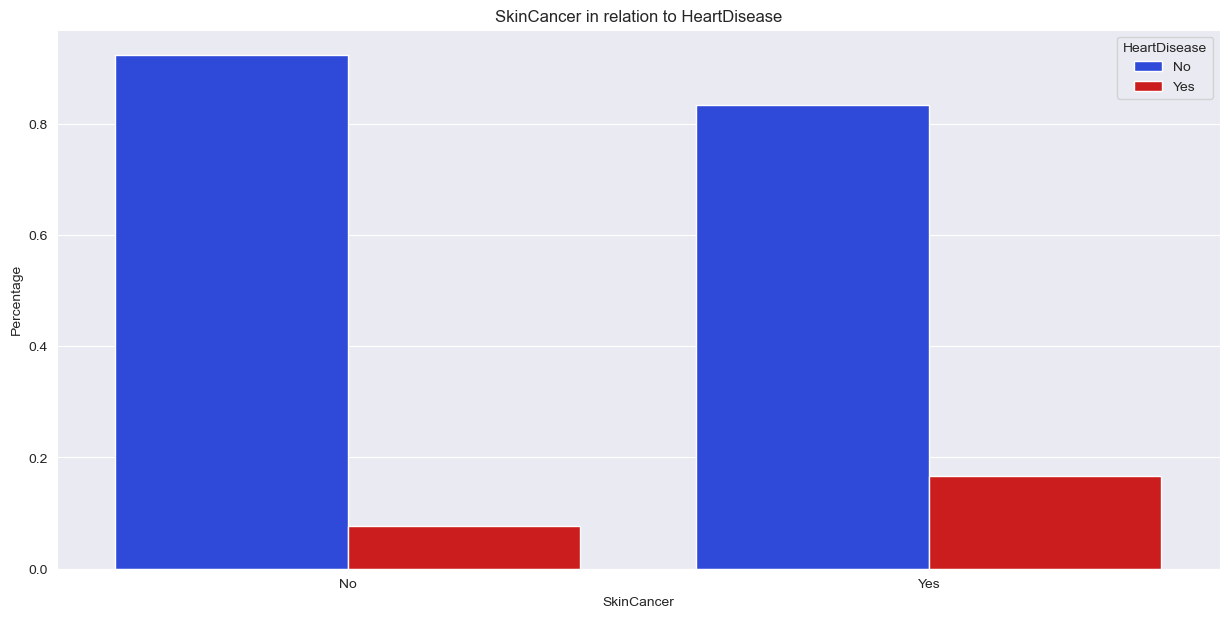

In [105]:
show_relation(obj_cols[12], 'HeartDisease', type_='count')

Individuals who have had skin cancer face a moderately heightened risk of heart disease, with a prevalence of around 18%, compared to approximately 9% in those without a history of skin cancer.

### Exploring the relationship between difficulty walking and heart disease

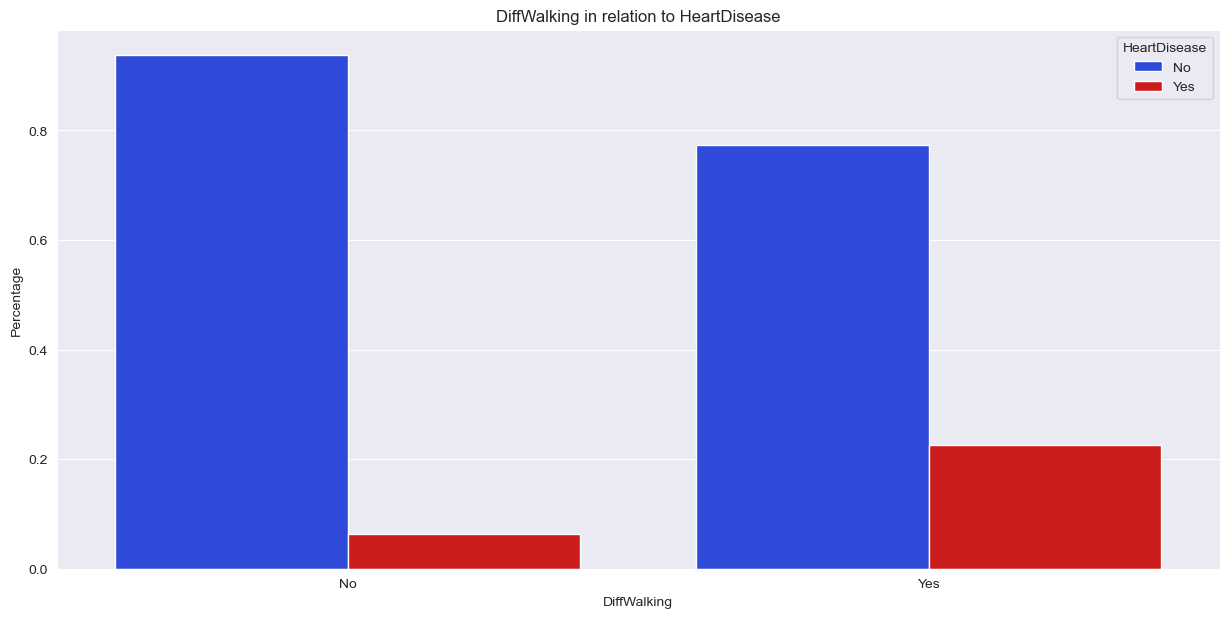

In [106]:
show_relation(obj_cols[3], 'HeartDisease', type_='count')

There is an occurrence of difficulty walking in about 18% of individuals with heart disease, contrasting with a lower percentage of around 7% in healthy individuals. This suggests a notable association between heart disease and challenges in mobility.

### Exploring the relationship between mental health and heart disease

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x700 with 0 Axes>

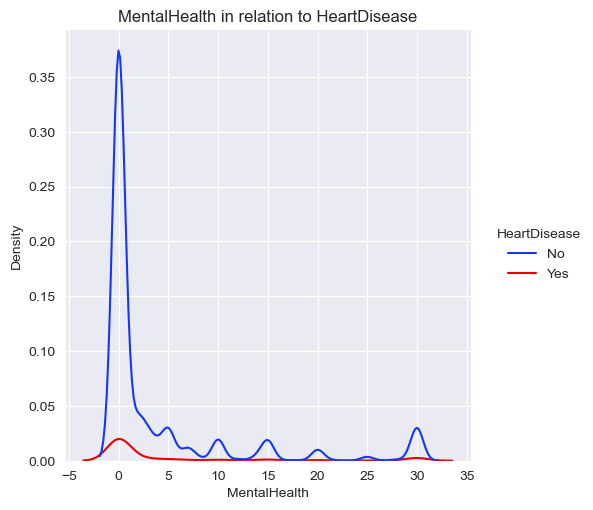

In [ ]:
show_relation(num_cols[2], 'HeartDisease')